In [18]:
import pandas as pd
import numpy as np
import re, string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [19]:
df = pd.read_csv("complaints/complaints.csv", low_memory=False)



In [20]:


df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-07-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,346XX,NaN,Other,Web,2020-07-06,Closed with explanation,Yes,NaN,3730948
1,2025-09-18,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,77077,NaN,NaN,Web,2025-09-18,In progress,Yes,NaN,16016736
2,2025-09-04,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,IL,60619,NaN,NaN,Web,2025-09-04,In progress,Yes,NaN,15722832
3,2025-09-18,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,11434,NaN,NaN,Web,2025-09-18,In progress,Yes,NaN,16028872
4,2025-09-05,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,NC,283XX,NaN,NaN,Web,2025-09-05,In progress,Yes,NaN,15762150


In [21]:
df = df[['Consumer complaint narrative', 'Product']].dropna()


In [22]:
categories = {
    'Credit reporting, credit repair services, or other personal consumer reports': 0,
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Mortgage': 3
}

df = df[df['Product'].isin(categories.keys())].copy()
df['label'] = df['Product'].map(categories)
# ...existing code...
df['label'].value_counts()


label
0    807277
1    361923
3    133663
2      9461
Name: count, dtype: int64

Author: Shaik Magbul Basha | Date: 2025-09-28 11:30:34.788492


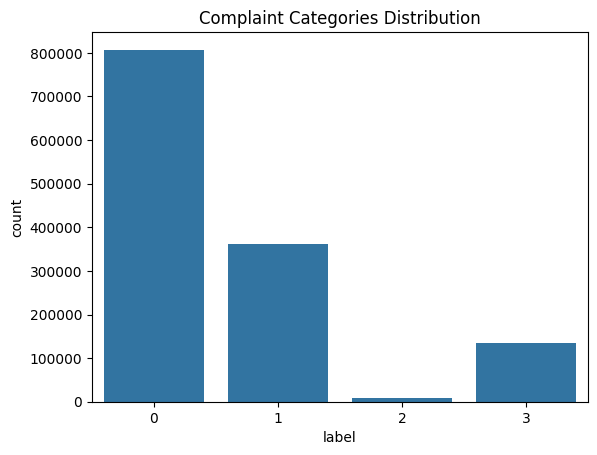

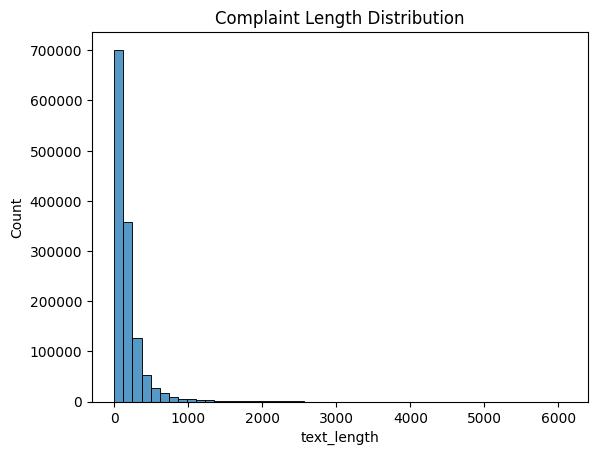

In [23]:
from datetime import datetime
print("Author: Shaik Magbul Basha | Date:", datetime.now())

df = df.copy()

# Add a new feature for complaint length
df['text_length'] = df['Consumer complaint narrative'].apply(lambda x: len(x.split()))

# Plot category distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Complaint Categories Distribution")
plt.show()

# Plot complaint length distribution
sns.histplot(df['text_length'], bins=50)
plt.title("Complaint Length Distribution")
plt.show()


In [24]:
print("Author: Shaik Magbul Basha | Date:", datetime.now())


def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['clean_text'] = df['Consumer complaint narrative'].apply(clean_text)

df[['Consumer complaint narrative','clean_text']].head()=


Author: Shaik Magbul Basha | Date: 2025-09-28 11:32:18.834233


,Consumer complaint narrative,clean_text
20,I am listing accounts below that have been rep...,i am listing accounts below that have been rep...
37,In accordance with the Fair Credit Reporting a...,in accordance with the fair credit reporting a...
44,On XX/XX/XXXX I requested the removal of Priva...,on xxxxxxxx i requested the removal of private...
47,These are not my accounts.,these are not my accounts
73,Ok this is for TransUnion. I originally challe...,ok this is for transunion i originally challen...


In [26]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [27]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [28]:

print("Author: Shaik Magbul Basha | Date:", datetime.now())

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
}
results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))


Author: Shaik Magbul Basha | Date: 2025-09-28 11:40:14.345133

Logistic Regression Results:
Accuracy: 0.906143676299697
              precision    recall  f1-score   support

           0       0.92      0.94      0.93    161455
           1       0.87      0.83      0.85     72385
           2       0.67      0.37      0.47      1892
           3       0.92      0.93      0.93     26733

    accuracy                           0.91    262465
   macro avg       0.84      0.77      0.80    262465
weighted avg       0.90      0.91      0.90    262465


Naive Bayes Results:
Accuracy: 0.8749242756177014
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    161455
           1       0.84      0.76      0.80     72385
           2       0.43      0.28      0.34      1892
           3       0.82      0.95      0.88     26733

    accuracy                           0.87    262465
   macro avg       0.75      0.73      0.73    262465
weighted avg  

Author: Shaik Magbul Basha | Date: 2025-09-28 11:50:06.025311


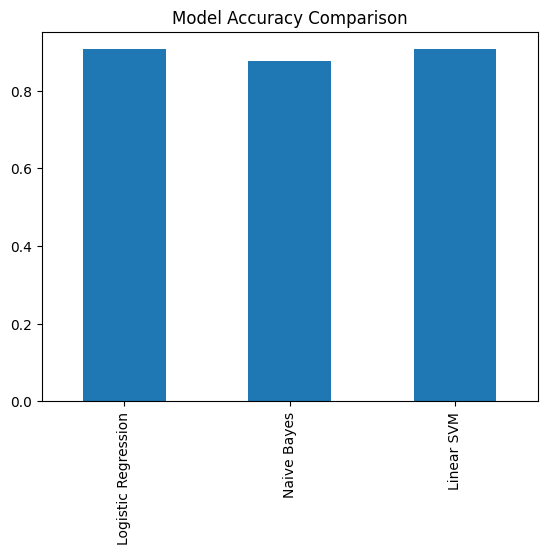

In [29]:
print("Author: Shaik Magbul Basha | Date:", datetime.now())


results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.plot(kind='bar', legend=False, title="Model Accuracy Comparison")
plt.show()


Author: Shaik Magbul Basha | Date: 2025-09-28 11:50:06.764977


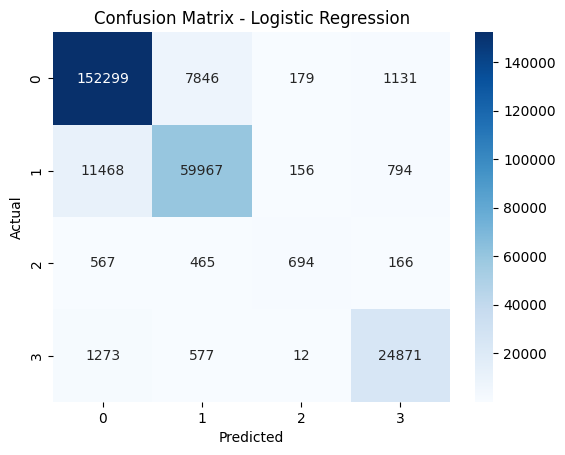

In [30]:
print("Author: Shaik Magbul Basha | Date:", datetime.now())


best_model = LogisticRegression(max_iter=200)
best_model.fit(X_train_tfidf, y_train)
y_pred = best_model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [31]:
print("Author: Shaik Magbul Basha | Date:", datetime.now())


sample = ["A debt collector keeps calling me about a debt I do not owe and is threatening legal action."]
sample_tfidf = tfidf.transform(sample)
pred = best_model.predict(sample_tfidf)

label_map = {v: k for k, v in categories.items()}
print("Predicted Category:", label_map[pred[0]])


Author: Shaik Magbul Basha | Date: 2025-09-28 11:52:46.350021
Predicted Category: Debt collection
